<a href="https://colab.research.google.com/github/hl105/deep-learning-practice/blob/main/simpleLinearLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0001 cost = 0.533827484
Epoch: 0002 cost = 0.358915895
Epoch: 0003 cost = 0.330996633
Epoch: 0004 cost = 0.316575080
Epoch: 0005 cost = 0.306954831
Epoch: 0006 cost = 0.300123990
Epoch: 0007 cost = 0.294997662
Epoch: 0008 cost = 0.290780395
Epoch: 0009 cost = 0.287236691
Epoch: 0010 cost = 0.284266979
Epoch: 0011 cost = 0.281761408
Epoch: 0012 cost = 0.279742718
Epoch: 0013 cost = 0.277730405
Epoch: 0014 cost = 0.275958717
Epoch: 0015 cost = 0.274432302
Learning finished
Accuracy: 0.8866000175476074
Label:  4
Prediction:  4


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


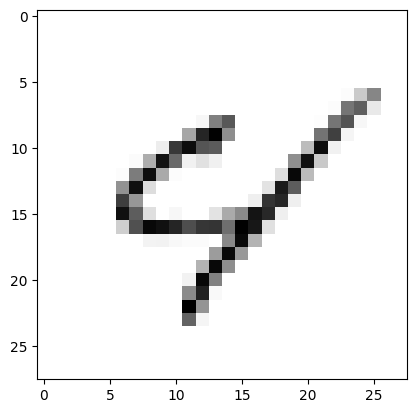

Label:  4
Prediction:  4


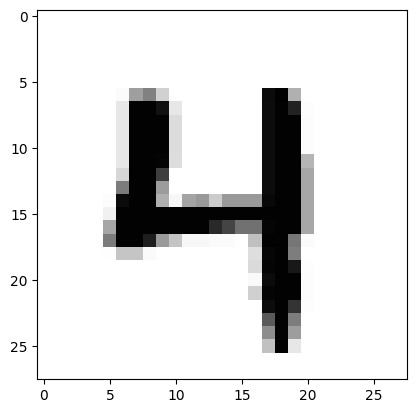

Label:  1
Prediction:  1


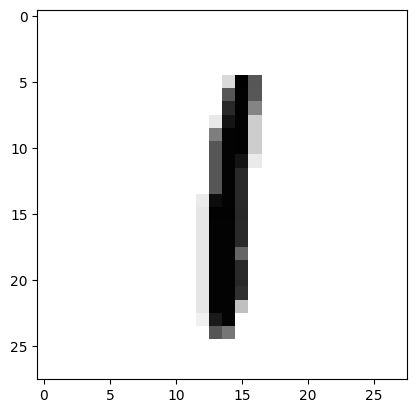

Label:  3
Prediction:  3


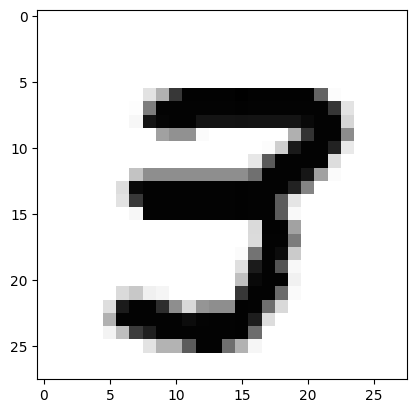

Label:  0
Prediction:  0


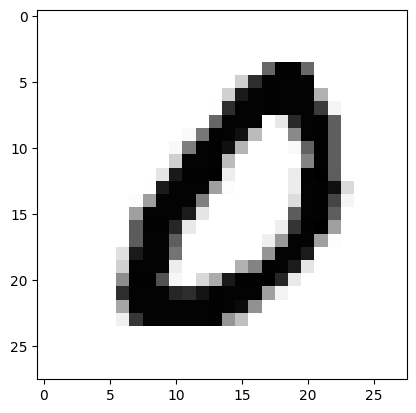

Label:  0
Prediction:  0


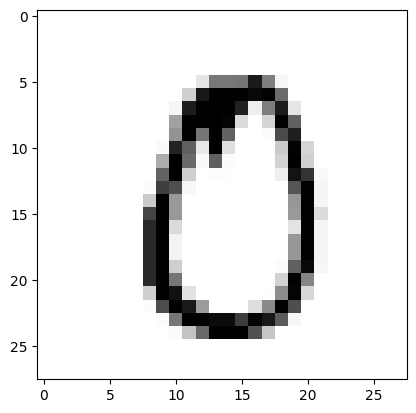

In [6]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

from itertools import repeat

device = torch.device('cpu')

# parameters
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, transform = transforms.ToTensor(),download = True)
mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(), download = True)

#dataset loader
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

# MINST data image of shape 28*28 = 784
linear = torch.nn.Linear(784,10,bias=True).to(device)

#define cost & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    # reshape input impages from batch into 2D tensor
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch



  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

# Testing
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict

for i in repeat(None, 6):

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()




